## Random Forest y XGBoost
Vamos a crear y medir el rendimiento relativo de los modelos de regresión Random Forest y XGBoost para predecir precios de viviendas utilizando el conjunto de datos de viviendas de California.
‘Rendimiento’ se refiere tanto a la velocidad como a la precisión.

Importamos las bibliotecas:


In [26]:
# Importa la biblioteca NumPy para operaciones numéricas
import numpy as np

# Importa Matplotlib para visualizar datos mediante gráficos
import matplotlib.pyplot as plt

# Importa el conjunto de datos de viviendas de California desde scikit-learn
from sklearn.datasets import fetch_california_housing


# Importa la función para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importa el modelo de regresión Random Forest
from sklearn.ensemble import RandomForestRegressor

# Importa el modelo de regresión XGBoost
from xgboost import XGBRegressor

# Importa métricas para evaluar el rendimiento de los modelos
from sklearn.metrics import mean_squared_error, r2_score


# Importa la biblioteca time para medir el tiempo de ejecución
import time

In [14]:

# Carga el conjunto de datos de viviendas de California (Es un conjunto de datos que viene con scikit-learn)
data = fetch_california_housing()

# Separa las características (X) y la variable objetivo (y), que representa el precio medio de las viviendas
X, y = data.data, data.target

# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# El parámetro random_state asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Número de observaciones y características del dataset


In [15]:
# Obtiene el número de observaciones (filas) y el número de características (columnas) del conjunto de datos
N_observations, N_features = X.shape

# Imprime el número total de observaciones (casas) en el conjunto de datos
print('Number of Observations: ' + str(N_observations))

# Imprime el número total de características (variables explicativas) utilizadas para predecir el precio de las viviendas
print('Number of Features: ' + str(N_features))


Number of Observations: 20640
Number of Features: 8


Utilizamos solo un conjunto de datos.


### Inicializar modelos
En este paso vamos a definir el número de estimadores o árboles individuales que se utilizarán en cada modelo. También iniciamos los modelos de regresión Random Forest y XGBoost.

Utilizaremos los parámetros predeterminados para realizar las comparaciones de rendimiento. Como parte de la comparación de rendimiento, también mediremos los tiempos de entrenamiento de ambos modelos.


In [27]:
# Inicializa los modelos de regresión

# Define el número de estimadores base (árboles) que se utilizarán en cada modelo
n_estimators = 100

# Crea una instancia del modelo Random Forest con 100 árboles y una semilla aleatoria para reproducibilidad
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Crea una instancia del modelo XGBoost con 100 árboles y la misma semilla aleatoria
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [28]:
# Entrena los modelos y mide el tiempo de entrenamiento

# Mide el tiempo de entrenamiento para el modelo Random Forest
start_time_rf = time.time()           # Guarda el tiempo justo antes de comenzar el entrenamiento
rf.fit(X_train, y_train)              # Entrena el modelo Random Forest con los datos de entrenamiento
end_time_rf = time.time()             # Guarda el tiempo justo después de finalizar el entrenamiento
rf_train_time = end_time_rf - start_time_rf  # Calcula el tiempo total de entrenamiento en segundos



# Mide el tiempo de entrenamiento para el modelo XGBoost
start_time_xgb = time.time()         # Guarda el tiempo justo antes de comenzar el entrenamiento
xgb.fit(X_train, y_train)            # Entrena el modelo XGBoost con los datos de entrenamiento
end_time_xgb = time.time()           # Guarda el tiempo justo después de finalizar el entrenamiento
xgb_train_time = end_time_xgb - start_time_xgb  # Calcula el tiempo total de entrenamiento en segundos

### Usamos los modelos entrenados para predecir el conjunto de prueba
También medimos el tiempo que tarda cada modelo en realizar las predicciones usando la función time.time() para registrar el tiempo antes y después de cada predicción.


In [18]:
# Mide el tiempo de predicción para el modelo Random Forest
start_time_rf = time.time()           # Guarda el tiempo justo antes de hacer la predicción
y_pred_rf = rf.predict(X_test)        # Realiza la predicción sobre el conjunto de prueba
end_time_rf = time.time()             # Guarda el tiempo justo después de la predicción
rf_pred_time = end_time_rf - start_time_rf  # Calcula el tiempo total de predicción en segundos

# Mide el tiempo de predicción para el modelo XGBoost
start_time_xgb = time.time()          # Guarda el tiempo justo antes de hacer la predicción
y_pred_xgb = xgb.predict(X_test)      # Realiza la predicción sobre el conjunto de prueba
end_time_xgb = time.time()            # Guarda el tiempo justo después de la predicción
xgb_pred_time = end_time_xgb - start_time_xgb  # Calcula el tiempo total de predicción en segundos

### Calcula el MSE y R² de cada uno de los modelos.


In [19]:
# Calcula el error cuadrático medio (MSE) para cada modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)     # MSE del modelo Random Forest
mse_xgb = mean_squared_error(y_test, y_pred_xgb)   # MSE del modelo XGBoost

# Calcula el coeficiente de determinación R² para cada modelo
r2_rf = r2_score(y_test, y_pred_rf)                # R² del modelo Random Forest
r2_xgb = r2_score(y_test, y_pred_xgb)              # R² del modelo XGBoost

### Imprime el MSE y R² de los modelos


In [29]:
# Imprime las métricas de rendimiento de ambos modelos

# Muestra el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para el modelo Random Forest
print(f'Random Forest:  MSE = {mse_rf:.4f}, R² = {r2_rf:.4f}')

# Muestra el MSE y R² para el modelo XGBoost
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R² = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2554, R² = 0.8051
      XGBoost:  MSE = 0.2226, R² = 0.8301


Puedes ver por los valores de MSE y R² que XGBoost es mejor que Random Forest, pero las diferencias no son abrumadoras.


### Imprime los tiempos de cada modelo


In [30]:
# Imprime los tiempos de entrenamiento y de prueba (predicción) para ambos modelos

# Muestra el tiempo que tardó el modelo Random Forest en entrenarse y en hacer predicciones
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')

# Muestra el tiempo que tardó el modelo XGBoost en entrenarse y en hacer predicciones
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 21.070 seconds, Testing time = 0.164 seconds
      XGBoost:  Training Time = 0.353 seconds, Testing time = 0.009 seconds


Resulta muy impresionante la diferencia en el tiempo de cómputo entre XGBoost y Random Forest, tanto en el entrenamiento como en la predicción.


A continuación, generamos gráficos de dispersión entre los valores predichos y los reales para ambos modelos, con el fin de evaluar visualmente lo bien que funciona cada uno.

Trazaremos líneas que representen una desviación estándar por encima y por debajo de la línea ideal, es decir, la línea que representa al regresor perfecto, donde todas las predicciones son correctas.

### Calculamos la desviación estándar


In [22]:
# Calcula la desviación estándar de los valores reales del conjunto de prueba (y_test)
std_y = np.std(y_test)

In [31]:
# Mide el tiempo de predicción para el modelo Random Forest
start_time_rf = time.time()               # Guarda el tiempo justo antes de hacer la predicción
y_pred_rf = rf.predict(X_test)            # Realiza la predicción con el modelo Random Forest sobre el conjunto de prueba
end_time_rf = time.time()                 # Guarda el tiempo justo después de la predicción
rf_pred_time = end_time_rf - start_time_rf  # Calcula el tiempo total de predicción

# Mide el tiempo de predicción para el modelo XGBoost
start_time_xgb = time.time()              # Guarda el tiempo justo antes de hacer la predicción
y_pred_xgb = xgb.predict(X_test)          # Realiza la predicción con el modelo XGBoost sobre el conjunto de prueba


end_time_xgb = time.time()                # Guarda el tiempo justo después de la predicción
xgb_pred_time = end_time_xgb - start_time_xgb  # Calcula el tiempo total de predicción

# Calcula el error cuadrático medio (MSE) para ambos modelos
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calcula el coeficiente de determinación (R²) para ambos modelos
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Imprime las métricas de rendimiento para Random Forest
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')


# Imprime las métricas de rendimiento para XGBoost
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

# Imprime los tiempos de entrenamiento y predicción para Random Forest
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')

# Imprime los tiempos de entrenamiento y predicción para XGBoost
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

# Calcula la desviación estándar de los valores reales del conjunto de prueba
std_y = np.std(y_test)

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 21.070 seconds, Testing time = 0.193 seconds
      XGBoost:  Training Time = 0.353 seconds, Testing time = 0.017 seconds


### Visualiza los resultados


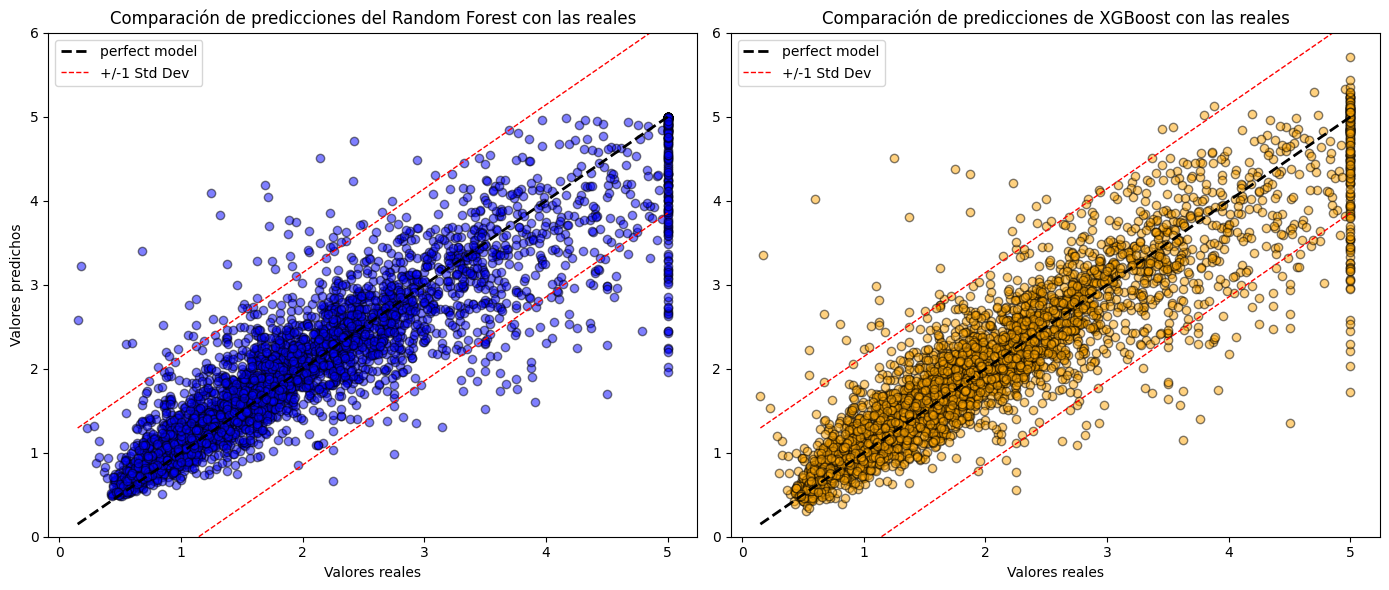

In [36]:
# Crea una figura con tamaño 14x6 pulgadas
plt.figure(figsize=(14, 6))

# --- Gráfico para Random Forest ---
plt.subplot(1, 2, 1)  # Primer subplot (1 fila, 2 columnas, posición 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", ec='k')  # Puntos de dispersión entre valores reales y predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="perfect model")  # Línea ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")  # Línea +1 desviación estándar
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1)  # Línea -1 desviación estándar
plt.ylim(0, 6)  # Límite del eje Y
plt.title("Comparación de predicciones del Random Forest con las reales")  # Título del gráfico
plt.xlabel("Valores reales")  # Etiqueta del eje X
plt.ylabel("Valores predichos")  # Etiqueta del eje Y
plt.legend()  # Muestra la leyenda

# --- Gráfico para XGBoost ---
plt.subplot(1, 2, 2)  # Segundo subplot (posición 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange", ec='k')  # Puntos de dispersión
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="perfect model")  # Línea ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")  # Línea +1 desviación estándar


plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1)  # Línea -1 desviación estándar
plt.ylim(0, 6)  # Límite del eje Y
plt.title("Comparación de predicciones de XGBoost con las reales")  # Título del gráfico
plt.xlabel("Valores reales")  # Etiqueta del eje X
plt.legend()  # Muestra la leyenda

# Ajusta el diseño para que los subplots no se solapen
plt.tight_layout()

# Muestra los gráficos
plt.show()


Ambos modelos tuvieron un rendimiento muy bueno. La mayoría de sus predicciones caen dentro de una desviación estándar del valor objetivo.
Curiosamente, Random Forest “respeta” el límite superior (el valor máximo) presente en los datos objetivo al mantenerse dentro de sus límites, mientras que XGBoost “se excede” o sobrepasa ese límite.
